In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import timedelta, datetime

In [4]:
np.random.seed(42)

In [6]:
start_date = datetime.strptime("2023-01-01", "%Y-%m-%d")
date_range = [start_date + timedelta(days=x) for x in range(180)]

In [8]:
channels = ['Email', 'Chat', 'Phone']
case_types = ['General', 'Technical', 'Billing', 'Other']

In [11]:
data = []

for date in date_range:
    for channel in channels:
        ticket_volume = np.random.poisson(120) if channel == 'Email' else np.random.poisson(90) if channel == 'Chat' else np.random.poisson(60)
        agents_available = np.random.randint(8, 20)
        avg_handling_time = np.round(np.random.normal(15, 5), 2)
        sla_met_pct = np.clip(np.random.normal(90, 5), 70, 100)
        case_type = random.choice(case_types)
        cost_per_case = np.round(np.random.uniform(3.5, 7.5), 2)
        tickets_resolved = int(ticket_volume * (sla_met_pct / 100))

        data.append([
            date.strftime("%Y-%m-%d"),
            channel,
            ticket_volume,
            agents_available,
            avg_handling_time,
            sla_met_pct,
            case_type,
            cost_per_case,
            tickets_resolved
        ])

In [13]:
df = pd.DataFrame(data, columns=[
    'date', 'channel', 'ticket_volume', 'agents_available',
    'avg_handling_time', 'sla_met_pct', 'case_type',
    'cost_per_case', 'tickets_resolved'
])

In [16]:
df.to_csv("workforce_capacity_data.csv", index=False)

In [19]:
df.head()

,date,channel,ticket_volume,agents_available,avg_handling_time,sla_met_pct,case_type,cost_per_case,tickets_resolved
0,2023-01-01,Email,115,9,13.28,88.127329,General,4.96,101
1,2023-01-01,Chat,88,12,8.26,90.078411,Technical,5.80,79
2,2023-01-01,Phone,63,8,10.02,78.389093,Technical,4.69,49
3,2023-01-02,Email,121,17,16.12,92.508956,Billing,4.01,111
4,2023-01-02,Chat,86,9,8.58,94.411502,Billing,7.37,81


In [23]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               540 non-null    object 
 1   channel            540 non-null    object 
 2   ticket_volume      540 non-null    int64  
 3   agents_available   540 non-null    int64  
 4   avg_handling_time  540 non-null    float64
 5   sla_met_pct        540 non-null    float64
 6   case_type          540 non-null    object 
 7   cost_per_case      540 non-null    float64
 8   tickets_resolved   540 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 38.1+ KB


In [26]:
print(df.isnull().sum())

date                 0
channel              0
ticket_volume        0
agents_available     0
avg_handling_time    0
sla_met_pct          0
case_type            0
cost_per_case        0
tickets_resolved     0
dtype: int64


In [28]:
df.describe()

,ticket_volume,agents_available,avg_handling_time,sla_met_pct,cost_per_case,tickets_resolved
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,90.303704,13.477778,14.794074,90.294117,5.422259,81.074074
std,27.138557,3.485122,5.132368,4.931490,1.133893,25.016397
min,40.000000,8.000000,0.830000,75.566386,3.510000,33.000000
25%,64.000000,10.000000,11.395000,86.784753,4.450000,57.750000
50%,89.000000,13.500000,14.575000,90.326859,5.370000,81.000000
75%,114.000000,16.000000,18.532500,94.130397,6.360000,102.000000
max,153.000000,19.000000,29.720000,100.000000,7.480000,139.000000


In [30]:
df['date'] = pd.to_datetime(df['date'])

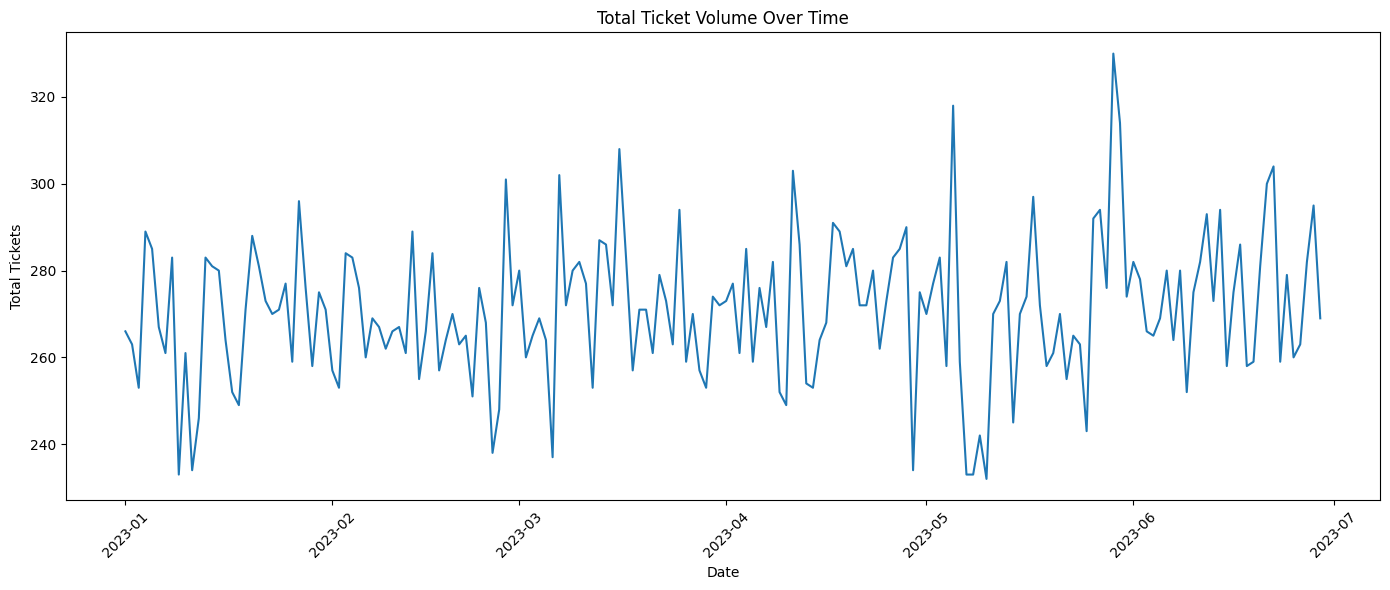

In [32]:
# Total volume over time
plt.figure(figsize=(14,6))
sns.lineplot(data=df.groupby('date')['ticket_volume'].sum().reset_index(), x='date', y='ticket_volume')
plt.title("Total Ticket Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Total Tickets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

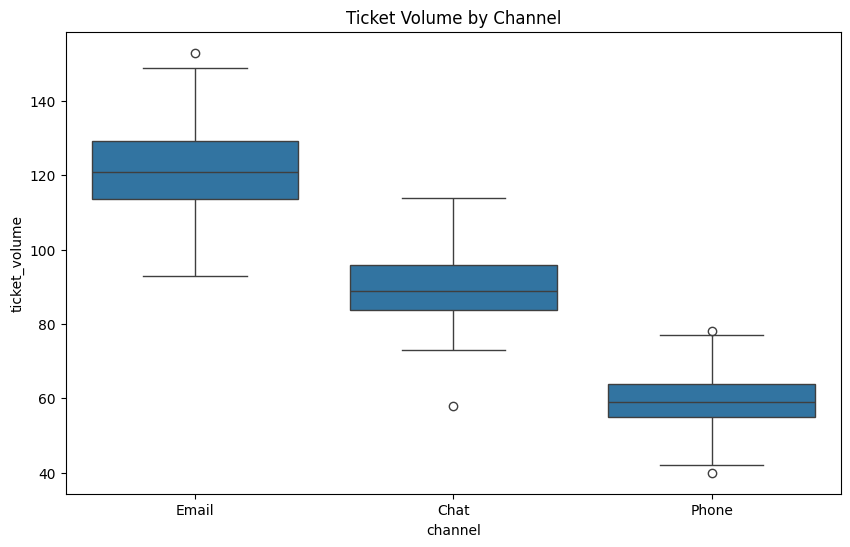

In [34]:
# Volume by channel
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='channel', y='ticket_volume')
plt.title("Ticket Volume by Channel")
plt.show()

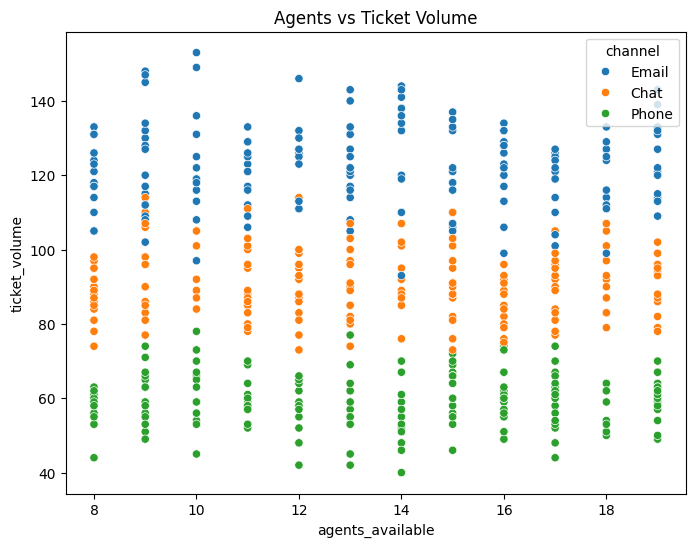

In [36]:
# Agent Availability vs. Volume
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='agents_available', y='ticket_volume', hue='channel')
plt.title("Agents vs Ticket Volume")
plt.show()

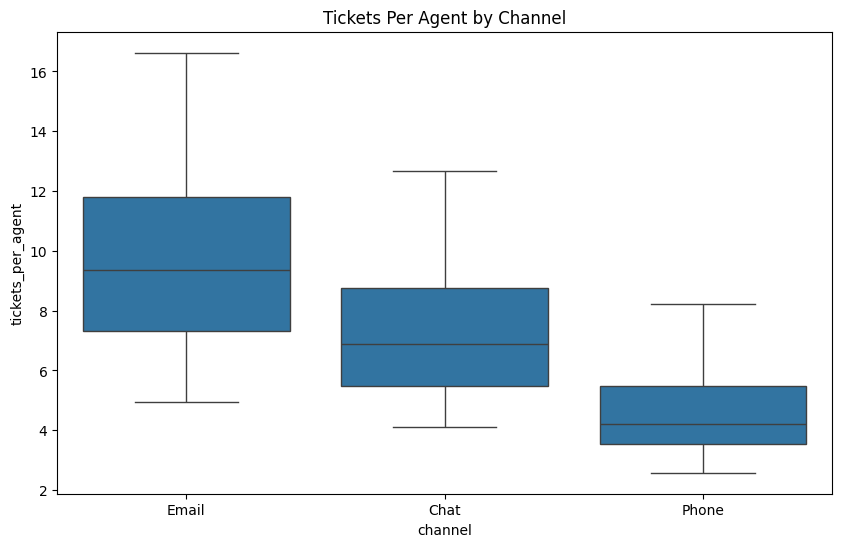

In [39]:
df['tickets_per_agent'] = df['ticket_volume'] / df['agents_available']

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='channel', y='tickets_per_agent')
plt.title("Tickets Per Agent by Channel")
plt.show()

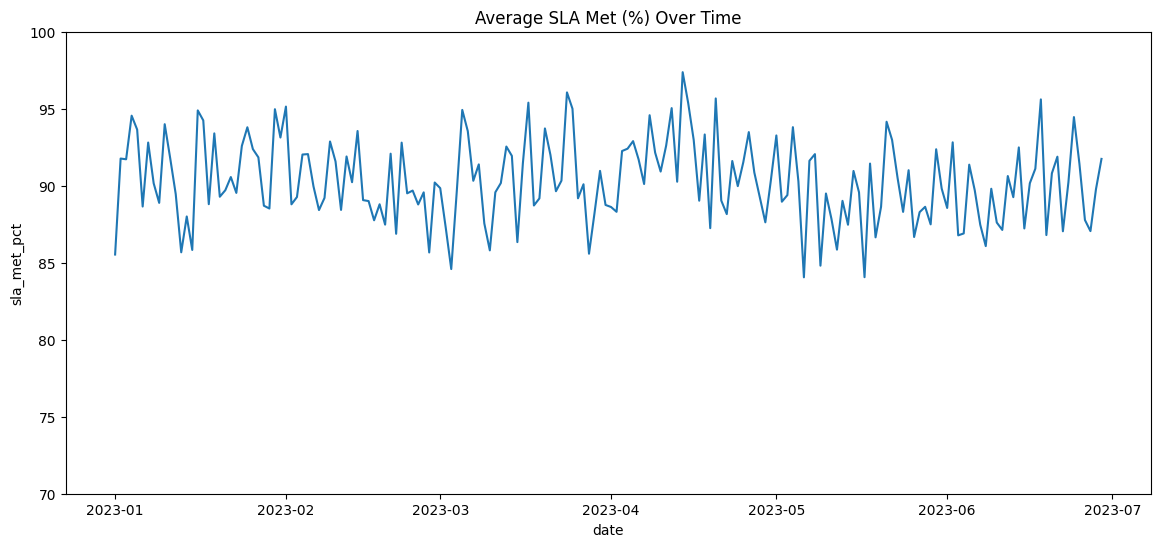

In [41]:
#SLA Compliance & Cost
plt.figure(figsize=(14,6))
sns.lineplot(data=df.groupby('date')['sla_met_pct'].mean().reset_index(), x='date', y='sla_met_pct')
plt.title("Average SLA Met (%) Over Time")
plt.ylim(70, 100)
plt.show()

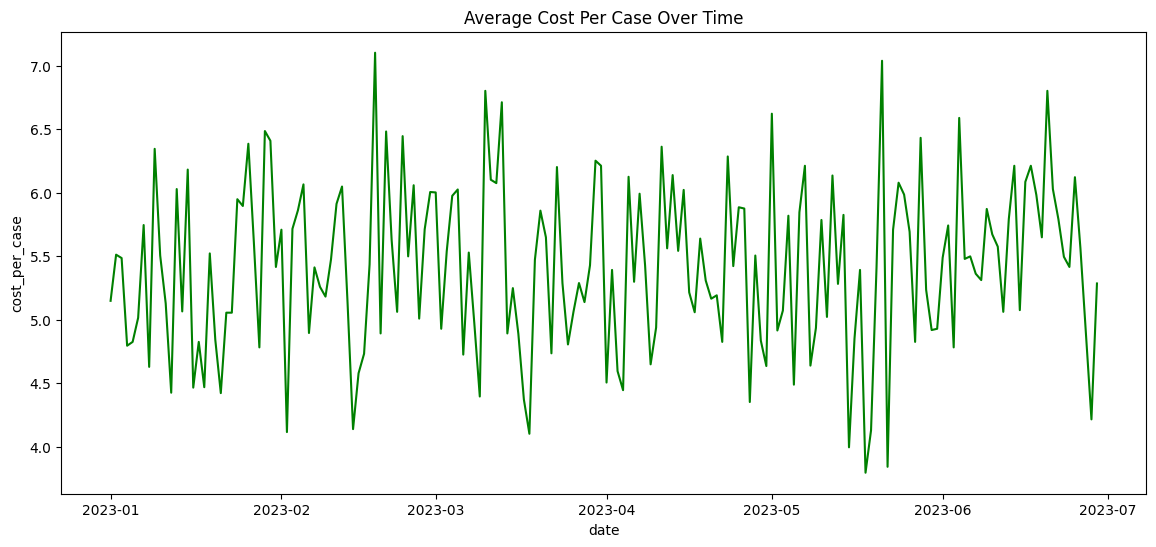

In [42]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df.groupby('date')['cost_per_case'].mean().reset_index(), x='date', y='cost_per_case', color='green')
plt.title("Average Cost Per Case Over Time")
plt.show()

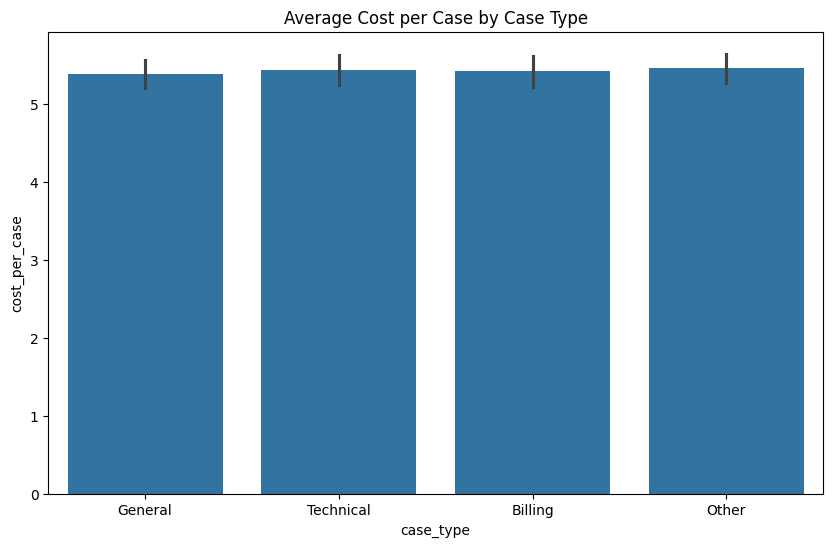

In [44]:
#Cost by Case Type or Channel
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='case_type', y='cost_per_case')
plt.title("Average Cost per Case by Case Type")
plt.show()

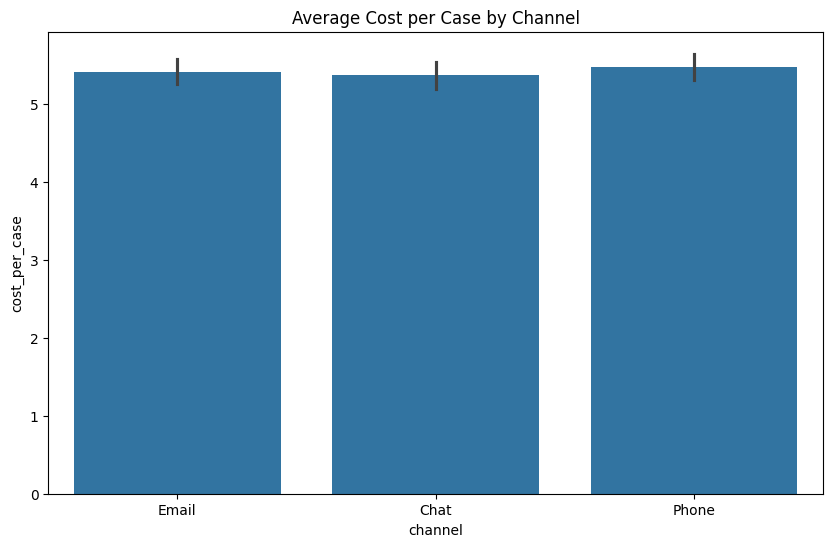

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='channel', y='cost_per_case')
plt.title("Average Cost per Case by Channel")
plt.show()

### Consclusion
#### Ticket volumes vary significantly across channels, with Email consistently receiving the highest volume, followed by Chat and Phone.
#### A positive correlation exists between ticket volume and agents available, but certain days show high tickets per agent, indicating understaffing or poor shift planning.
#### SLA compliance remains high overall (average ~90%), but a few periods show SLA dips, often corresponding with lower agent availability or high ticket days.
#### Cost per case varies by channel and case type, with Technical and Phone support cases being relatively more expensive.